# Image content segmentation

## importing libraries

In [1]:
import os
import os.path
import cv2
import glob
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

## reading the image

In [2]:
image = cv2.imread('/home/drake/Desktop/captcha scanner/solved-captchas/electoral-tagged/51457.png')
#image= cv2.resize(image, (100, 50)) 

## image

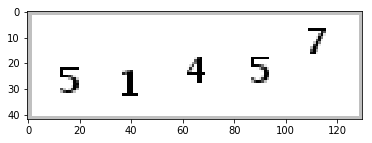

In [3]:
plt.imshow(image, cmap='gray')

## convert to gray scale

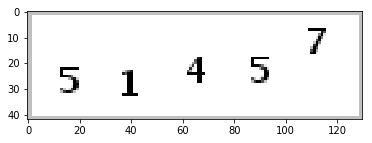

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

## binarize the image

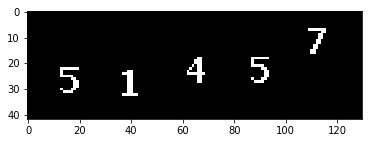

In [5]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')

## finding the contours in the image

In [6]:
contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

### initializing the numeric image regions

In [7]:
image_regions = []

### assigning the contours to the letter image regions and checking those contours which might have a possibility of two numbers together 

In [8]:
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if w / h > 1.25:                               #if width is bigger then the height then that contour 
        half_width = int(w / 2)                    # is divided into two parts with respect to width
        image_regions.append((x, y, half_width, h))
        image_regions.append((x + half_width, y, half_width, h))
    else:
        image_regions.append((x, y, w, h))

## arranging the numeric image regions with respect to the horizonatal order of the capctcha

In [9]:
image_regions = sorted(image_regions, key=lambda x: x[0])

In [10]:
image_regions

[(13, 22, 7, 10),
 (37, 23, 6, 10),
 (62, 18, 7, 10),
 (87, 18, 7, 10),
 (109, 7, 7, 10)]

## forming the bounding box over the original gray image

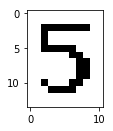

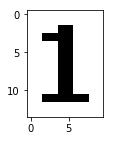

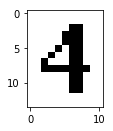

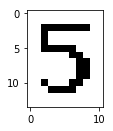

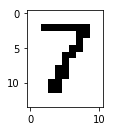

In [12]:
%matplotlib inline
for bounding_box in image_regions:
    x,y,w,h = bounding_box
    number_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]
    _,number_image= cv2.threshold(number_image,127,255,cv2.THRESH_BINARY)
    plt.figure(figsize=(3,3))
    plt.subplot(121),plt.imshow(number_image,cmap = 'gray')